Plots I think look reasonable, out of time now unfortunately, thinking that this system could not be well approximated by a simple magnetic or electric dipole


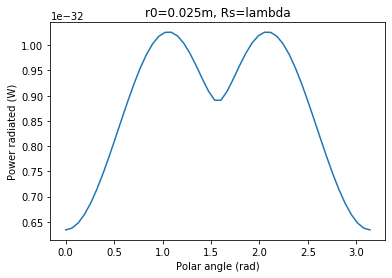

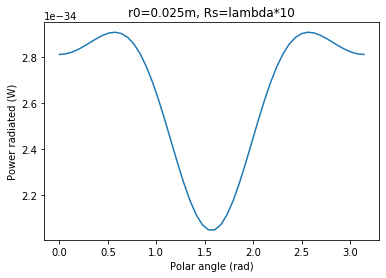

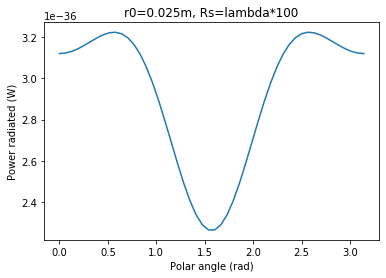

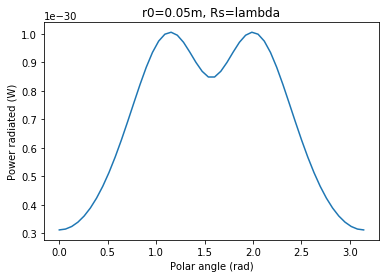

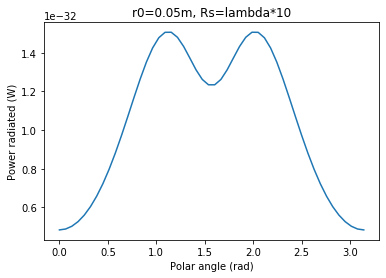

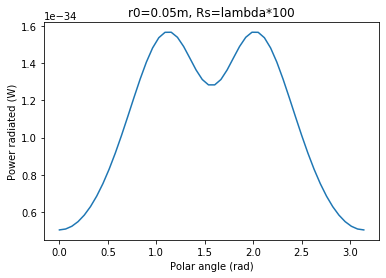

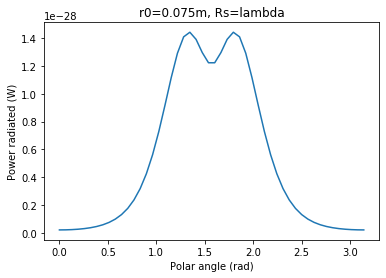

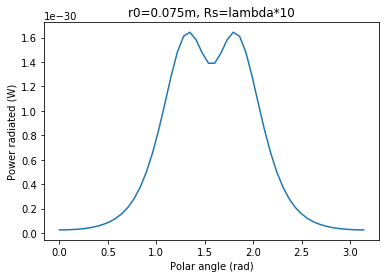

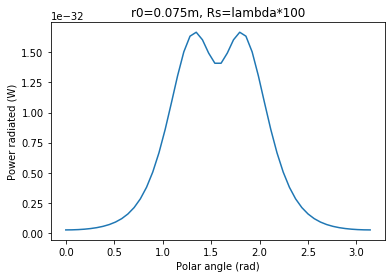

In [29]:
import numpy as np
import scipy as sp
from scipy.integrate import odeint
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

epsilon0=8.85*10**-12
mu0= 4*np.pi*10**-7
c=3e8
f=500*10**6
lamb=c/f #this is how I will write lambda avoiding the keyword

#Let's do E field from stationary particle first:
def Eq1(x,y,z):
    q=1.602e-19 #lets do elementary charge for q+ and q-
    Ex=1/(4*np.pi*epsilon0)*q*x/(np.sqrt((x**2+y**2+z**2))**3)
    Ey=1/(4*np.pi*epsilon0)*q*y/(np.sqrt((x**2+y**2+z**2))**3)
    Ez=1/(4*np.pi*epsilon0)*q*z/(np.sqrt((x**2+y**2+z**2))**3)
    return [Ex,Ey,Ez]

#Now E and B for the moving particle using equation 10.72 and 10.73 from Griffiths
w=2*np.pi*500*10**6

def Eq2(r0,t,x,y,z):
    q=-1.602e-19
    r_q=[r0*np.cos(w*t),r0*np.sin(w*t),0]
    r=np.array([x,y,z])-np.array(r_q)
    rhat=r/(np.sqrt(r[0]**2+r[1]**2+r[2]**2))
    v=[-w*r0*np.sin(w*t),w*r0*np.cos(w*t),0]
    u=c*rhat-v
    a=np.linalg.norm(v)**2/r0*(-rhat)
    E=q/(4*np.pi*epsilon0)*np.linalg.norm(r)/(np.dot(r,u)**3)*((c**2-np.linalg.norm(v)**2)*u+np.cross(r,np.cross(u,a)))
    return E

def Bq2(r0,t,x,y,z):
    r_q=[r0*np.cos(w*t),r0*np.sin(w*t),0]
    r=np.array([x,y,z])-np.array(r_q)
    rhat=r/(np.sqrt(r[0]**2+r[1]**2+r[2]**2))
    return 1/c*np.cross(rhat,Eq2(r0,t,x,y,z))

def S(r0,t,x,y,z):
    return 1/mu0*np.cross(Eq1(x,y,z)+Eq2(r0,t,x,y,z),Bq2(r0,t,x,y,z))

#want time averaged poynting vector
dt=1/f/500
tspan=np.arange(0,1/f,dt)

def S_avg(r0,x,y,z):
    result=0
    for i in tspan:
        result+=np.linalg.norm(S(r0,i,x,y,z))*dt
    return result/500

r0=[0.025,0.05,0.075]
Rs=[lamb,10*lamb,100*lamb]

#Lets look at theta values (polar angle) and y=0, remembering that we have spherical symmetry
thing1=[] #forgive my poor array naming please
thing2=[]
thing3=[]
angles=np.linspace(0,np.pi,50)
for j in r0:
    for k in Rs:
        for ang in angles:
            thing1.append(S_avg(j,k*np.sin(ang),0,k*np.cos(ang)))
        thing2.append(thing1)
        thing1=[]
    thing3.append(thing2)
    thing2=[]
        
Rs_names=['lambda','lambda*10','lambda*100']
for i in range(3):
    for j in range(3):
        figure()
        plt.title('r0='+str(r0[i])+'m, Rs='+str(Rs_names[j]))
        plt.plot(angles,thing3[i][j])
        plt.xlabel('Polar angle (rad)')
        plt.ylabel('Power radiated (W)')


print('Plots I think look reasonable, out of time now unfortunately, thinking that this system could not be\
 well approximated by a simple magnetic or electric dipole')
                                         
                                         